<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">BNB: SPARQL query<br>Compare the # of resources <br>published by year for two Subjects</h1>
    <p class="lead">This notebook explains how to query it to retrieve records of resources indexed under two given Subjects / Topics (LCSH), and compare their number by publication year.</p>
  </div>
</div>

<a href="https://colab.research.google.com/github/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/blob/master/LOD_SPARQL/01_BNB_SPARQL_Compare_Publication_Year_for_two_Subjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The [BNB Linked Data Platform](https://bnb.data.bl.uk/) provides access to the [British National Bibliography (BNB)](http://www.bl.uk/bibliographic/natbib.html) published as linked open data and made available through SPARQL services. 

<p class="alert alert-warning" role="alert">

## Define the Subjects to Compare

Set the Subject to search from [LCSH list](http://id.loc.gov/authorities/subjects.html):

In [ ]:
# Examples -- uncomment the desired subject, or added your own set of Subject and Label, and do "Run" or "Runtime" > "Run all" or "Run all cells":

Label = ''

# Subject = 'Nanotubes'
# Label = 'Nanotubes'

Subject1 = 'Climaticchanges'
Label1 = 'Climatic Changes'

Subject2 = 'Globalwarming'
Label2 = 'Global Warming'

#### Required modules / libraries

In [ ]:
import requests
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
from pandas import json_normalize

## Let's query the repository by asking the publications indexed by the defined Subjects
We will use the [SPARQL endpoint](https://bnb.data.bl.uk/flint-sparql) to create the query and configure the request to retrieve json as a result.

In [ ]:
url = 'https://bnb.data.bl.uk/sparql'
query = """
PREFIX bibo: <http://purl.org/ontology/bibo/> 
PREFIX dct: <http://purl.org/dc/terms/> 
PREFIX schema: <http://schema.org/> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

SELECT ?resource ?isbn ?title ?date ?author ?authorUri WHERE {{
      ?resource dct:subject <http://bnb.data.bl.uk/id/concept/lcsh/{0}>;  
            dct:title ?title ; 
            schema:author ?authorUri ; 
            schema:datePublished ?date . 
      ?authorUri rdfs:label ?author .
}}  
"""

# Query for Subject 1
query1 = query.format(Subject1)

# use json as a result
headers = {'Accept': 'application/sparql-results+json'}
r = requests.get(url, params = {'format': 'application/sparql-results+json', 'query': query1}, headers=headers)
print('Records retrieved for subject ' + Label1)


Records retrieved for subject Climatic Changes


In [ ]:
# print(r.text)

## Load the data into DataFrames

In [ ]:
bnbdata = json.loads(r.text)
dfSub1 = json_normalize(bnbdata['results']['bindings']) 
dfSub1.head(2)

resource.type  ...                              authorUri.value
0           uri  ...  http://bnb.data.bl.uk/id/person/KellyElaine
1           uri  ...  http://bnb.data.bl.uk/id/person/KellyElaine

[2 rows x 10 columns]

In [ ]:
# Query for Subject 2
query2 = query.format(Subject2)

r = requests.get(url, params = {'format': 'application/sparql-results+json', 'query': query2}, headers=headers)
print('Elements retrieved for subject ' + Label2)

bnbdata = json.loads(r.text)
dfSub2 = json_normalize(bnbdata['results']['bindings']) 
dfSub2.head(2)

Elements retrieved for subject Global Warming


resource.type  ...                                    authorUri.value
0           uri  ...  http://bnb.data.bl.uk/id/person/KitchenDavid1956-
1           uri  ...  http://bnb.data.bl.uk/id/person/KitchenDavid1956-

[2 rows x 10 columns]

## How many items?

In [ ]:
# How many items for each Subject?
print('Number of records retrieved for subject ' + Label1 + ': ' + str(len(dfSub1)))
print('Number of records retrieved for subject ' + Label2 + ': ' + str(len(dfSub2)))


Number of records retrieved for subject Climatic Changes: 1211
Number of records retrieved for subject Global Warming: 455


### Let's count the number of Resources by author

In [ ]:
#Subject 1
resources_by_author_Sub1 = dfSub1['author.value'].value_counts()
print('Rank of Authors about ' + Label1)
resources_by_author_Sub1

Rank of Authors about Climatic Changes


Dessler, Andrew Emory                     12
Houghton, J. T. (John Theodore), 1931-    12
Gribbin, John, 1946-                      12
Goodell, Jeff                             10
Grove, Jean M.                            10
                                          ..
Goodess, C. M.                             1
Jarman, Melanie                            1
Craven, Greg                               1
Bows, Alice, 1974-                         1
Money, D. C.                               1
Name: author.value, Length: 596, dtype: int64

In [ ]:
#Subject 2
resources_by_author_Sub2 = dfSub2['author.value'].value_counts()
print('Rank of Authors about ' + Label2)
resources_by_author_Sub2

Rank of Authors about Global Warming


Houghton, J. T. (John Theodore), 1931-       18
Hansen, James E. (James Edward), 1941-       12
Johansen, Bruce E. (Bruce Elliott), 1950-    10
Booker, Christopher                           8
Lynas, Mark, 1973-                            8
                                             ..
Gray, Vincent, Ph. D.                         1
Nisbet, E. G. (Euan George)                   1
Craven, Greg                                  1
Jarman, Melanie                               1
Ying, Jun                                     1
Name: author.value, Length: 218, dtype: int64

### Create a chart to visualize the results
First let's see a top of publication Dates:

### Let's group the books by year

In [ ]:
# First we create a new column in pandas with the year
dfSub1['year'] = pd.DatetimeIndex(dfSub1['date.value']).year
dfSub2['year'] = pd.DatetimeIndex(dfSub2['date.value']).year

# Check first five from Subject 1 books
dfSub1['year'].head(5)

0    2019
1    2019
2    2019
3    2019
4    2015
Name: year, dtype: int64

### Creating the chart of resources per year

In [ ]:
# .sort_index() is very important = sorts by year, instead of the the regular count number

resources_by_year_Sub1 = dfSub1['year'].value_counts().sort_index()
resources_by_year_Sub2 = dfSub2['year'].value_counts().sort_index()

# let's check for Subject 1
resources_by_year_Sub1

1974      1
1975      2
1976      4
1977      2
1978      4
1979      3
1981      4
1982      4
1983      2
1984      1
1986      2
1988      3
1989      8
1990      4
1992     12
1993      5
1994      2
1995      9
1996      4
1997     14
1998      7
1999      8
2000     15
2001     15
2002     12
2003     18
2004     16
2005     17
2006     18
2007     34
2008     51
2009     44
2010     56
2011     39
2012     42
2013     50
2014     42
2015    108
2016    115
2017    118
2018    125
2019    116
2020     55
Name: year, dtype: int64

Text(0, 0.5, 'Number of Published Resources')

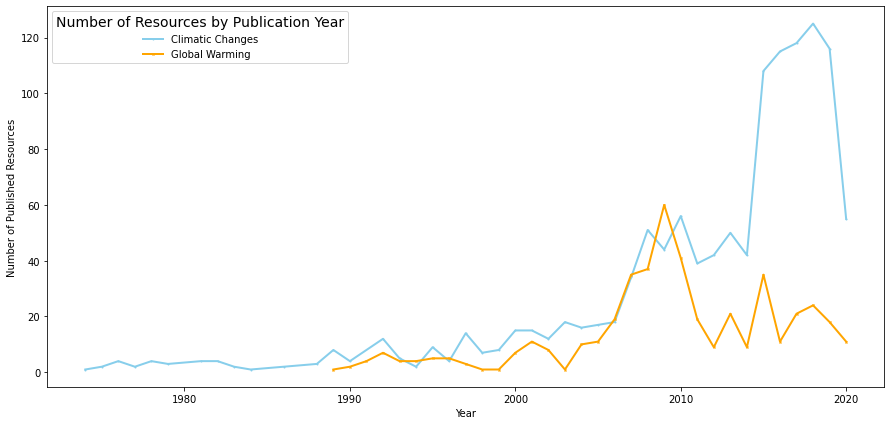

In [ ]:
plt.figure(figsize=(15,7))
resources_by_year_Sub1.plot(marker='o', markerfacecolor='blue', markersize=1, color='skyblue', linewidth=2, label=Label1)
resources_by_year_Sub2.plot(marker='x', color='orange', markersize=2, linewidth=2, label=Label2)
plt.legend(title = 'Number of Resources by Publication Year', title_fontsize = '14')
plt.xlabel("Year")
plt.ylabel("Number of Published Resources")